In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [30]:
#directory="/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/results/counts/"
directory="/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/gtex/results/protein-coding"
#directory="/Users/filippo/Developer/tesi/gtex"
os.chdir(directory)

In [31]:
A=[]
for a in open("A.dat",'r'):
    A.append(a)

In [32]:
A = np.sort(np.array(A, dtype=float))
A

array([0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.33798e+09,
       1.55589e+10, 1.71290e+10])

In [33]:
len(A)

18913

In [34]:
norm = np.sum(A,dtype=float)
norm

671524902154.0

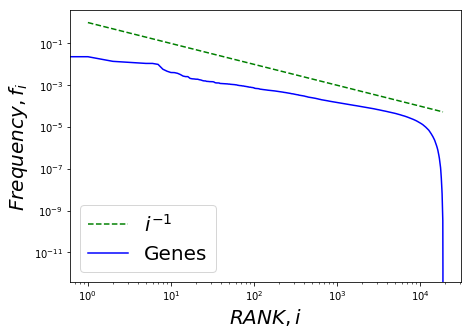

In [35]:
fig = plt.figure(figsize=(7,5))
x = np.arange(1, len(A))
plt.ylabel("$Frequency, f_i$", fontsize=20)
plt.xlabel("$RANK, i$", fontsize=20)
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-7,1)
plt.plot(x, 1./x, 'g--', label='$i^{-1}$')
plt.plot(np.sort(A/norm)[::-1], c='blue', label='Genes')
plt.legend(fontsize=20)
plt.show()

In [36]:
fig.savefig("globalzipf.pdf")

# Occurrences distribution

In [9]:
O=[]
for o in open("O.dat",'r'):
    O.append(o)

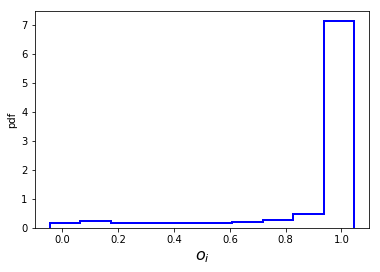

In [10]:
bins = 11
rang = (0-0.5/bins, 1+0.5/bins)
fig=plt.figure()
plt.hist(np.array(O, dtype=float), histtype='step', lw=2, range = rang, color='blue', density=True)
plt.xlabel("$o_i$", fontsize=16)
plt.ylabel("pdf")
plt.show()

In [11]:
fig.savefig("globalU.pdf")

# null model

## zipf

In [12]:
A_null=[]
for a in open("A_null.dat",'r'):
    A_null.append(a)

In [13]:
A_null=A

In [14]:
A_null = np.array(A_null, dtype=float)
len(A_null)

18913

In [15]:
norm_null = np.sum(A_null)
norm_null

671524902154.0

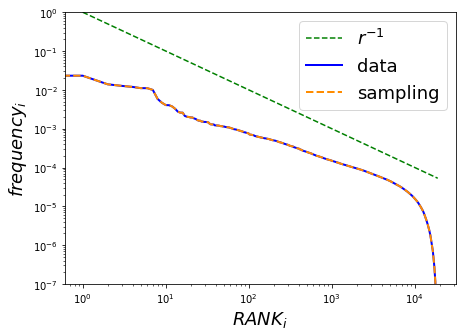

In [16]:
fig = plt.figure(figsize=(7,5))
x = np.arange(1, len(A))
plt.ylabel("$frequency_i$", fontsize=18)
plt.xlabel("$RANK_i$", fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-7,1)
plt.plot(x, 1./x, 'g--', label='$r^{-1}$')
plt.plot(np.sort(A/norm)[::-1], lw=2, c='blue', label='data')
plt.plot(np.sort(A_null/norm_null)[::-1], c='darkorange', lw=2, ls='dashed', label='sampling')
plt.legend(fontsize=18)
plt.show()

In [17]:
fig.savefig("globalzipf_null.pdf")

## occurrences

In [18]:
O_null=[]
for o in open("O_null.dat",'r'):
    O_null.append(o)

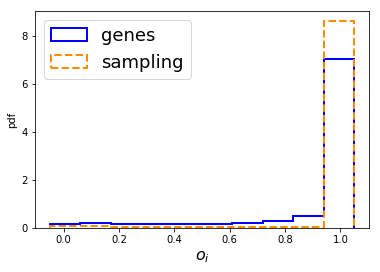

In [19]:
bins = 10
rang = (0-0.5/bins, 1+0.5/bins)
fig=plt.figure()
plt.hist(np.array(O, dtype=float), histtype='step', color='blue', lw=2, range=rang, density=True, label='genes', bins=bins)
plt.hist(np.array(O_null, dtype=float), histtype='step', color='darkorange', lw=2, ls='dashed', range=rang, density=True, label='sampling', bins=bins)
plt.xlabel("$o_i$", fontsize=16)
plt.ylabel("pdf")
plt.legend(fontsize=18, loc='upper left')
plt.show()

In [20]:
fig.savefig("globalU_null.pdf")

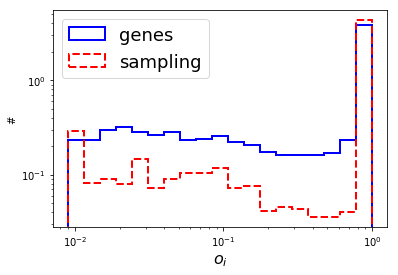

In [21]:
log_bins = np.logspace(np.log10(9e-3),0,20)
fig=plt.figure()
plt.hist(np.array(O, dtype=float), histtype='step', color='blue', lw=2, density=True, label='genes', bins=log_bins)
plt.hist(np.array(O_null, dtype=float), histtype='step', color='red', lw=2, ls='dashed', density=True, label='sampling', bins=log_bins)
plt.xlabel("$o_i$", fontsize=16)
plt.ylabel("#")
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=18, loc='upper left')
plt.show()
fig.savefig("globalU_null_sampling.pdf")

In [ ]:
np.random.multinomial(200,A/norm)

In [ ]:
heaps = pd.read_csv("heaps.dat", sep=',', header=None)
heaps.head()

In [ ]:
diff =[]
for size in heaps[0]:
    diff.append(len(np.nonzero(np.random.multinomial(size,A/norm))[0]))
diff

In [ ]:
plt.scatter(heaps[0],heaps[1])
plt.scatter(heaps[0],diff)

In [ ]:
pd.DataFrame(data=np.array([heaps[0],diff]).T).to_csv("heaps_null.dat", index=False, header=False)

In [ ]:
pd.DataFrame(data=np.array().T)